In [3]:
import numpy as np
import pandas as pd
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline

In [4]:
df = pd.read_csv("../train.csv") 

In [15]:
df_electrical_year = df.loc[:, ['YearBuilt', "Electrical"]]


In [16]:
df_electrical_year['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [17]:
with_dummies = pd.get_dummies(df_electrical_year, columns=['Electrical'])

In [18]:
def get_corr(data: pd.DataFrame):
    # Print correlation heatmap
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    f, ax = plt.subplots(figsize=(37,37))
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
 

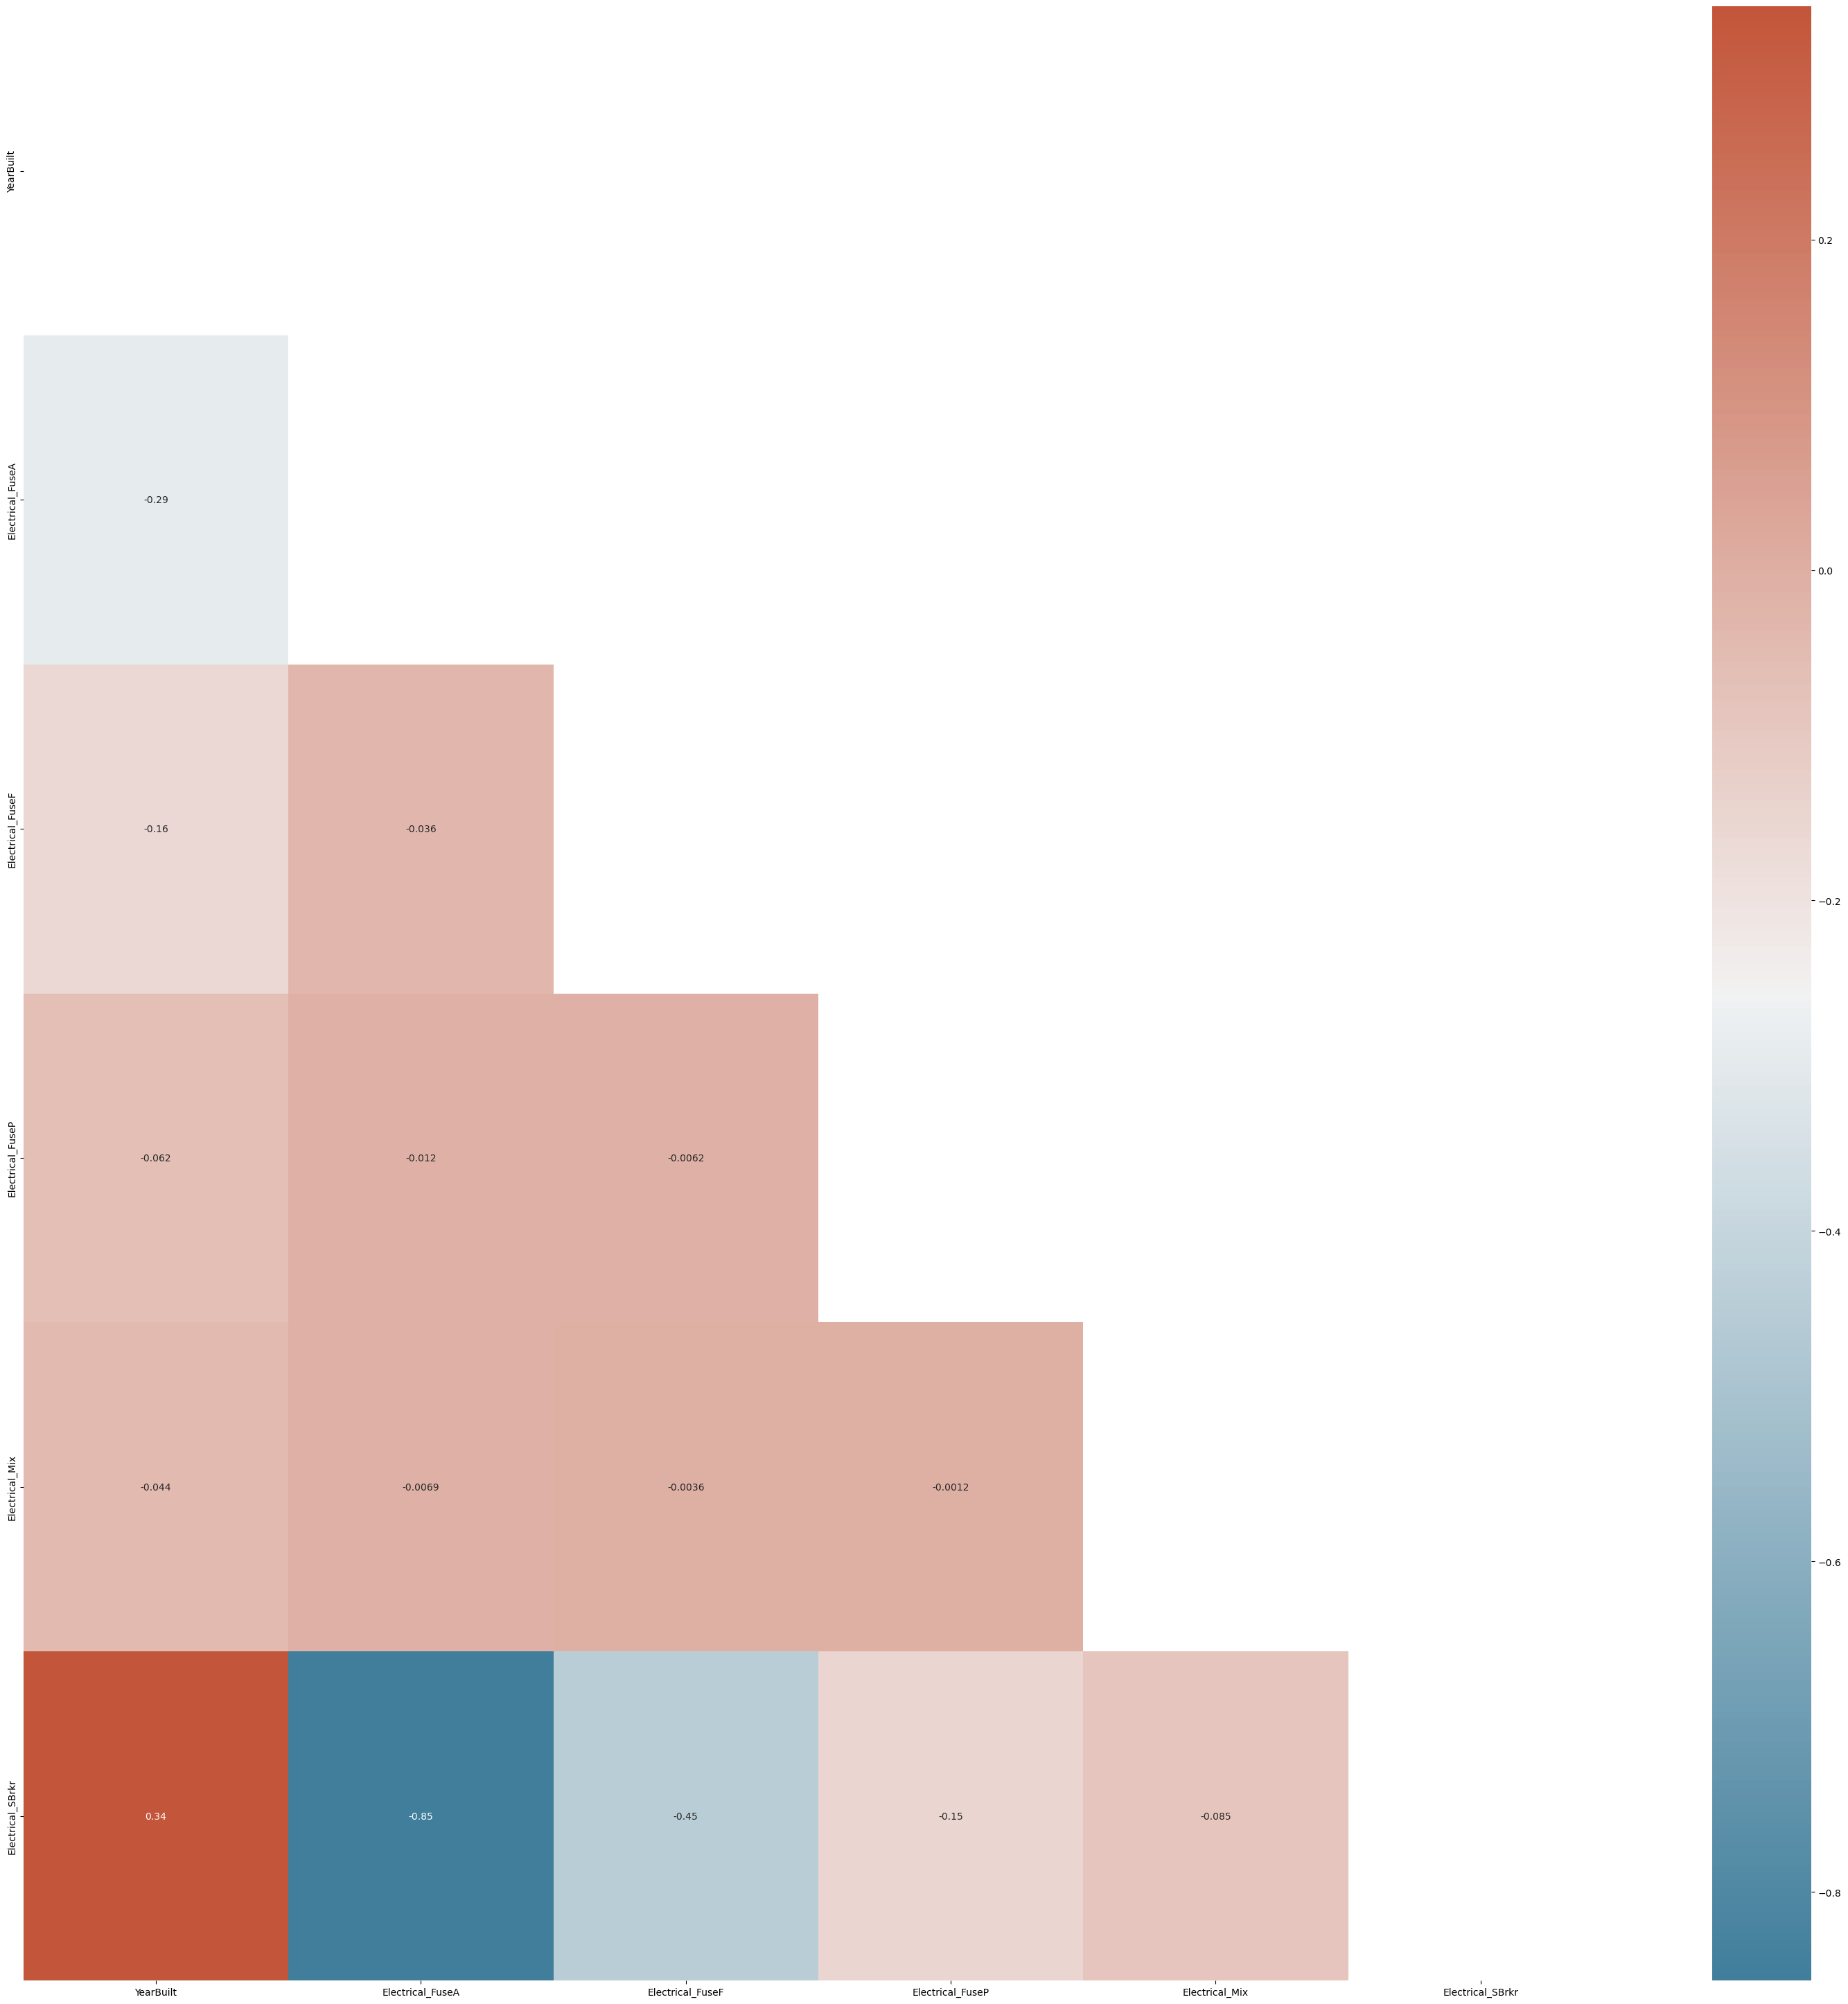

In [19]:

get_corr(with_dummies)

In [20]:
cats = df.loc[:, ['GarageCond', 'GarageQual']]

In [21]:
cats_encoded = pd.factorize(['NA', 'Po', 'Fa', 'TA', 'Gd','Ex'])

In [22]:
cats_encoded

(array([0, 1, 2, 3, 4, 5]),
 array(['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], dtype=object))

In [24]:
cats['GarageCond'] = pd.factorize(df['GarageCond'])[0]

In [27]:
cats['GarageCond'].value_counts()

 0    1326
-1      81
 1      35
 2       9
 3       7
 4       2
Name: GarageCond, dtype: int64